In [2]:
# 데이터 불러오기
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/고려대 미래 교육/행복요인_data.xlsx')
df.head()

,id,경제1,경제2,경제3,지식1,지식2,지식3,문화1,문화2,문화3,...,사회3,정서1,정서2,정서3,행복1,행복2,행복3,성별,연령대,거주지
0,1,5,5,4,4,4,4,3,3,3,...,2,3,3,2,3,3,3,2,5,1
1,2,2,3,2,2,2,2,2,2,1,...,4,2,2,2,3,3,3,2,5,4
2,3,2,3,2,3,3,3,5,4,3,...,3,3,2,2,3,3,3,2,5,2
3,4,4,4,3,3,3,3,4,4,3,...,5,3,4,3,4,4,4,2,4,2
4,5,3,3,3,3,3,3,4,4,5,...,1,3,3,2,2,2,2,1,1,4


In [5]:
df.columns

Index(['id', '경제1', '경제2', '경제3', '지식1', '지식2', '지식3', '문화1', '문화2', '문화3',
       '사회1', '사회2', '사회3', '정서1', '정서2', '정서3', '행복1', '행복2', '행복3', '성별',
       '연령대', '거주지'],
      dtype='object')

In [6]:
len(df.columns)

22

In [7]:
data = df
# 경제, 지식, 문화, 사회, 정서, 행복 관련 변수만 선택
data_selected = data[['경제1', '경제2', '경제3', '지식1', '지식2', '지식3', '문화1', '문화2', '문화3', '사회1', '사회2', '사회3', '정서1', '정서2', '정서3', '행복1', '행복2', '행복3']]

# 결측치 확인
data_selected.isnull().sum()


경제1    0
경제2    0
경제3    0
지식1    0
지식2    0
지식3    0
문화1    0
문화2    0
문화3    0
사회1    0
사회2    0
사회3    0
정서1    0
정서2    0
정서3    0
행복1    0
행복2    0
행복3    0
dtype: int64

In [9]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=dc89c076c907ee02eb84c26523cd74a346aea69f3abe97f241d980c36e709584
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [10]:
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO 검정
kmo_all, kmo_model = calculate_kmo(data_selected)
print(f'KMO: {kmo_model}')

# Bartlett의 구형성 검정
chi_square_value, p_value = calculate_bartlett_sphericity(data_selected)
print(f'Bartlett’s Test: chi-square = {chi_square_value}, p-value = {p_value}')


KMO: 0.8316414421369437
Bartlett’s Test: chi-square = 4540.176596054702, p-value = 0.0


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [11]:
from sklearn.decomposition import PCA

# 주성분분석 (PCA)
pca = PCA().fit(data_selected)
eigenvalues = pca.explained_variance_
print(f'Eigenvalues: {eigenvalues}')

# 고유값 1 이상인 요인 수 결정
n_factors = sum(eigenvalues >= 1)
print(f'Number of factors: {n_factors}')


Eigenvalues: [3.60352842 2.56417485 2.1762927  1.97025248 1.4065632  0.28539592
 0.26506024 0.25203305 0.23863425 0.19102839 0.14962582 0.13546006
 0.1323204  0.1160854  0.1076958  0.10019605 0.08416505 0.05960385]
Number of factors: 5


In [14]:
from factor_analyzer import FactorAnalyzer

# 요인분석
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(data_selected)

# 요인 적재량 출력
loadings = fa.loadings_
print(f'Factor Loadings: \n{loadings}')
ft = pd.DataFrame(loadings, index=data_selected.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])
ft

Factor Loadings: 
[[ 0.05380829  0.03942522  0.00533077  0.82643248  0.02930246]
 [ 0.01366039  0.06558552 -0.02474349  0.91301039  0.01260623]
 [-0.04160537  0.09884294 -0.05066562  0.88059444 -0.01886238]
 [ 0.03719496  0.10883599  0.86226634 -0.02665393 -0.00174834]
 [ 0.0624858   0.12188504  0.91836743 -0.06931802 -0.01219003]
 [ 0.03742545  0.18145032  0.88561073  0.02077902  0.00820279]
 [ 0.03466016  0.14614394 -0.03834892  0.02199157  0.82453748]
 [-0.00544434  0.04054641  0.02480179 -0.01688167  0.92721224]
 [-0.0174225   0.09125304  0.0100343   0.01839102  0.87023177]
 [-0.03699952  0.88639518  0.12253121  0.05017386  0.06988409]
 [-0.00164843  0.77030409  0.09278373  0.03813977  0.05945523]
 [-0.07870209  0.81808915  0.0691819   0.05374794  0.17984029]
 [ 0.88214607 -0.00104599  0.06341558 -0.02784415 -0.00592002]
 [ 0.89887995 -0.05672964 -0.03959297 -0.00343525 -0.00569888]
 [ 0.88551964 -0.02497412 -0.02329906 -0.02044755 -0.00376924]
 [ 0.60743737  0.6781      0.19612978

,Factor1,Factor2,Factor3,Factor4,Factor5
경제1,0.053808,0.039425,0.005331,0.826432,0.029302
경제2,0.013660,0.065586,-0.024743,0.913010,0.012606
경제3,-0.041605,0.098843,-0.050666,0.880594,-0.018862
지식1,0.037195,0.108836,0.862266,-0.026654,-0.001748
지식2,0.062486,0.121885,0.918367,-0.069318,-0.012190
지식3,0.037425,0.181450,0.885611,0.020779,0.008203
문화1,0.034660,0.146144,-0.038349,0.021992,0.824537
문화2,-0.005444,0.040546,0.024802,-0.016882,0.927212
문화3,-0.017422,0.091253,0.010034,0.018391,0.870232
사회1,-0.037000,0.886395,0.122531,0.050174,0.069884


In [13]:

loadings_df = pd.DataFrame(loadings, index=data_selected.columns, columns=[f'Factor{i+1}' for i in range(n_factors)])

# 요인 적재량 출력
print(loadings_df)


      Factor1   Factor2   Factor3   Factor4   Factor5
경제1  0.053808  0.039425  0.005331  0.826432  0.029302
경제2  0.013660  0.065586 -0.024743  0.913010  0.012606
경제3 -0.041605  0.098843 -0.050666  0.880594 -0.018862
지식1  0.037195  0.108836  0.862266 -0.026654 -0.001748
지식2  0.062486  0.121885  0.918367 -0.069318 -0.012190
지식3  0.037425  0.181450  0.885611  0.020779  0.008203
문화1  0.034660  0.146144 -0.038349  0.021992  0.824537
문화2 -0.005444  0.040546  0.024802 -0.016882  0.927212
문화3 -0.017422  0.091253  0.010034  0.018391  0.870232
사회1 -0.037000  0.886395  0.122531  0.050174  0.069884
사회2 -0.001648  0.770304  0.092784  0.038140  0.059455
사회3 -0.078702  0.818089  0.069182  0.053748  0.179840
정서1  0.882146 -0.001046  0.063416 -0.027844 -0.005920
정서2  0.898880 -0.056730 -0.039593 -0.003435 -0.005699
정서3  0.885520 -0.024974 -0.023299 -0.020448 -0.003769
행복1  0.607437  0.678100  0.196130  0.119803  0.015602
행복2  0.629524  0.612069  0.211397  0.096348  0.034952
행복3  0.615986  0.617839  0.2

In [15]:
def cronbach_alpha(items_scores):
    item_vars = items_scores.var(axis=0, ddof=1)
    total_var = items_scores.sum(axis=1).var(ddof=1)
    n_items = items_scores.shape[1]
    alpha = n_items / (n_items - 1) * (1 - item_vars.sum() / total_var)
    return alpha

# 크론바흐 알파 계산
alpha = cronbach_alpha(data_selected)
print(f'Cronbach\'s Alpha: {alpha}')


Cronbach's Alpha: 0.8120654604126307


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_excel('/content/drive/MyDrive/고려대 미래 교육/행복요인_data.xlsx')
data_selected = data[['경제1', '경제2', '경제3', '지식1', '지식2', '지식3', '문화1', '문화2', '문화3', '사회1', '사회2', '사회3', '정서1', '정서2', '정서3', '행복1', '행복2', '행복3']]


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)


pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

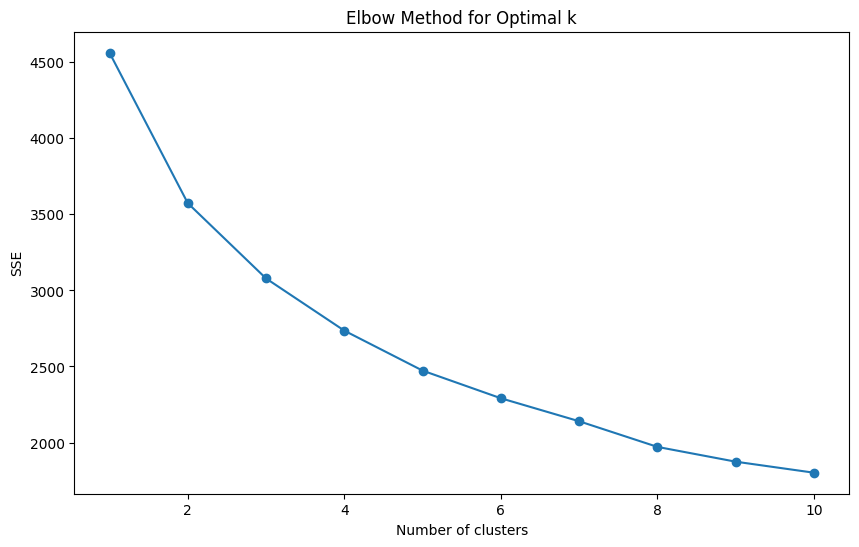

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 방법
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

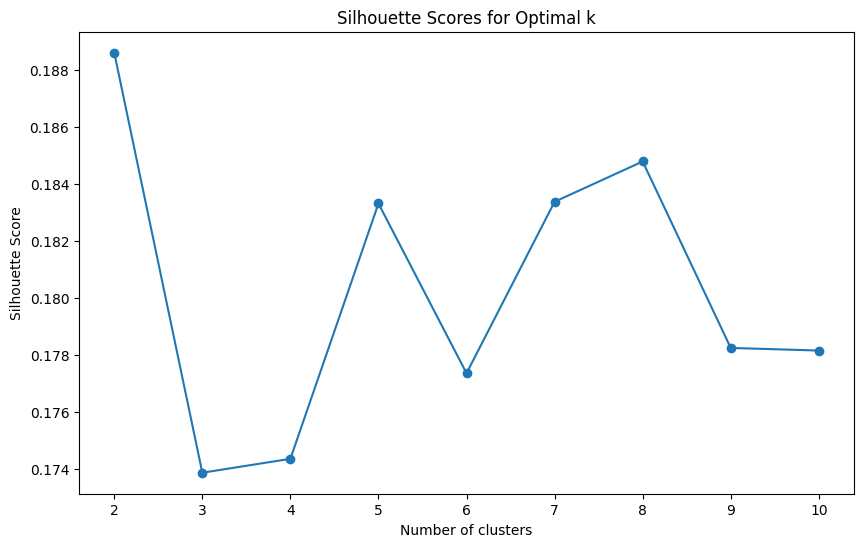

In [19]:
from sklearn.metrics import silhouette_score

# 최적의 군집 수 찾기
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    score = silhouette_score(data_pca, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [20]:

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)
labels = kmeans.labels_


data['Cluster'] = labels


data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,경제1,경제2,경제3,지식1,지식2,지식3,문화1,문화2,문화3,...,정서1,정서2,정서3,행복1,행복2,행복3,성별,연령대,거주지,Cluster
0,1,5,5,4,4,4,4,3,3,3,...,3,3,2,3,3,3,2,5,1,0
1,2,2,3,2,2,2,2,2,2,1,...,2,2,2,3,3,3,2,5,4,1
2,3,2,3,2,3,3,3,5,4,3,...,3,2,2,3,3,3,2,5,2,0
3,4,4,4,3,3,3,3,4,4,3,...,3,4,3,4,4,4,2,4,2,0
4,5,3,3,3,3,3,3,4,4,5,...,3,3,2,2,2,2,1,1,4,1


In [22]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq


import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


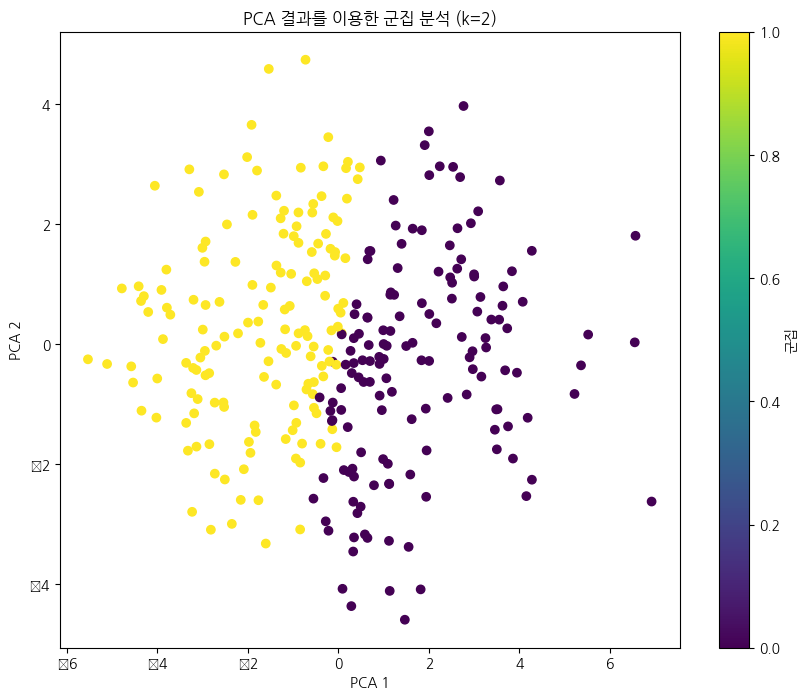

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'PCA 결과를 이용한 군집 분석 (k={optimal_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='군집')
plt.show()

